<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/Make_Blobs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [93]:
data,target=make_blobs(n_samples=1000,centers=3)

In [94]:
data.shape

(1000, 2)

In [95]:
data[:5]

array([[ 2.54612791,  9.14504777],
       [ 5.93225789,  2.54687898],
       [-7.61624481,  9.54176788],
       [ 0.32519933,  5.37612375],
       [ 0.36933715,  6.63484385]])

In [96]:
target[:5]

array([2, 1, 0, 2, 2])

In [97]:
target.shape

(1000,)

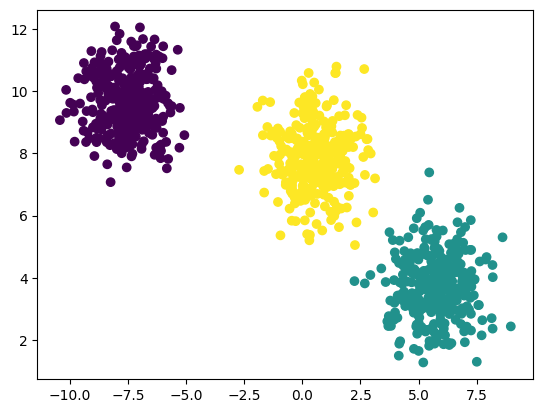

In [98]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [99]:
model=Sequential([
    Input(shape=[ None,2]),
    Dense(4,activation="relu"),
    Dense(4,activation="relu"),
    Dense(3,activation="softmax")
])

In [100]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, None, 4)           12        
                                                                 
 dense_25 (Dense)            (None, None, 4)           20        
                                                                 
 dense_26 (Dense)            (None, None, 3)           15        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [101]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25)

In [102]:
x_train.shape

(750, 2)

In [103]:
x_test.shape

(250, 2)

In [104]:
y_train.shape

(750,)

In [105]:
y_test.shape

(250,)

In [108]:
losses=tf.keras.losses.SparseCategoricalCrossentropy()
activation=tf.keras.optimizers.Adam()
model.compile(optimizer=activation,loss=losses,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
24/24 [==============================] - 2s 16ms/step - loss: 0.3678 - accuracy: 0.8507 - val_loss: 0.3663 - val_accuracy: 0.9200
Epoch 2/30
24/24 [==============================] - 0s 6ms/step - loss: 0.3235 - accuracy: 0.9293 - val_loss: 0.3165 - val_accuracy: 0.9640
Epoch 3/30
24/24 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.9880 - val_loss: 0.2657 - val_accuracy: 0.9920
Epoch 4/30
24/24 [==============================] - 0s 5ms/step - loss: 0.2304 - accuracy: 0.9960 - val_loss: 0.2146 - val_accuracy: 1.0000
Epoch 5/30
24/24 [==============================] - 0s 8ms/step - loss: 0.1847 - accuracy: 0.9987 - val_loss: 0.1691 - val_accuracy: 1.0000
Epoch 6/30
24/24 [==============================] - 0s 6ms/step - loss: 0.1451 - accuracy: 0.9987 - val_loss: 0.1301 - val_accuracy: 1.0000
Epoch 7/30
24/24 [==============================] - 0s 6ms/step - loss: 0.1128 - accuracy: 0.9987 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 8/30
24/24 [=

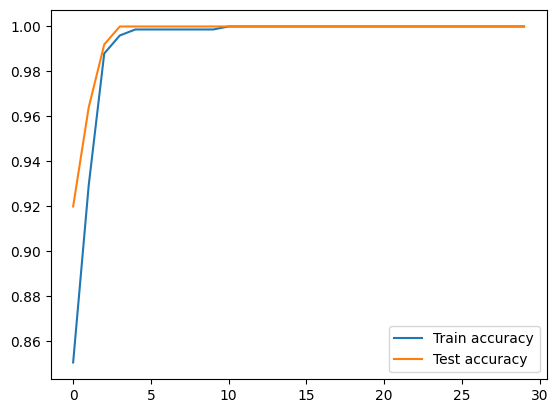

In [109]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="Test accuracy")
plt.legend()
plt.show()

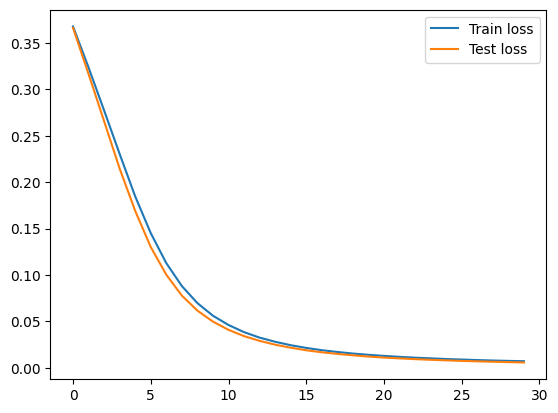

In [110]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test loss")
plt.legend()
plt.show()

In [111]:
y_pred=model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [112]:
y_pred.shape

(250, 3)

In [113]:
y_pred[:5]

array([[9.9825555e-01, 1.0026070e-04, 1.6440935e-03],
       [4.3401955e-13, 9.9999994e-01, 1.5723112e-12],
       [9.7736090e-02, 2.1356076e-03, 9.0012825e-01],
       [9.6363277e-04, 1.2858279e-04, 9.9890774e-01],
       [9.6923649e-01, 4.3436670e-04, 3.0329231e-02]], dtype=float32)

In [114]:
pred=[]
for i in range(len(x_test)):
  pred.append(np.argmax(y_pred[i]))

In [115]:
pred[:7]

[0, 1, 2, 2, 0, 2, 2]

<function matplotlib.pyplot.show(close=None, block=None)>

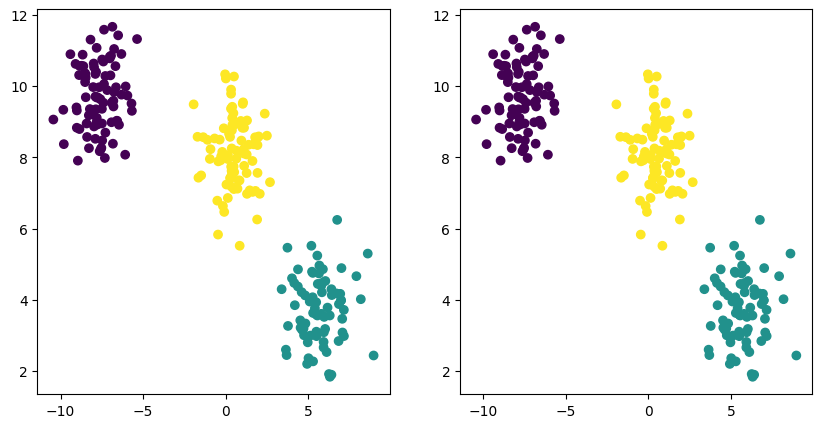

In [116]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.subplot(1,2,2)
plt.scatter(x_test[:,0],x_test[:,1],c=pred)
plt.show